# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [12]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [13]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

(5, 3)
Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [39]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 3.440708e-09
b2 max relative error: 4.447656e-11
W1 max relative error: 3.561318e-09
b1 max relative error: 2.738422e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732027


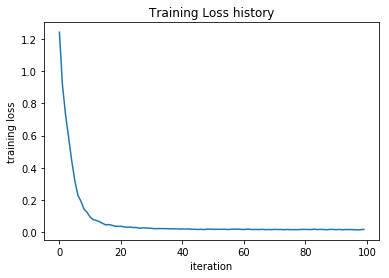

In [40]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [41]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [97]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.303377
iteration 100 / 1000: loss 1.733443
iteration 200 / 1000: loss 1.564687
iteration 300 / 1000: loss 1.588195
iteration 400 / 1000: loss 1.519241
iteration 500 / 1000: loss 1.628105
iteration 600 / 1000: loss 1.475365
iteration 700 / 1000: loss 1.476288
iteration 800 / 1000: loss 1.543528
iteration 900 / 1000: loss 1.427167
Validation accuracy:  0.502


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

Text(0,0.5,'Loss')

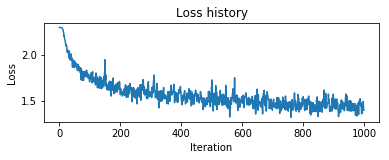

In [98]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')


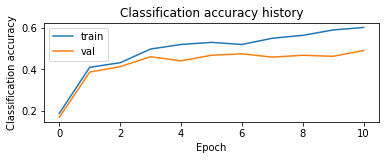

In [99]:
plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

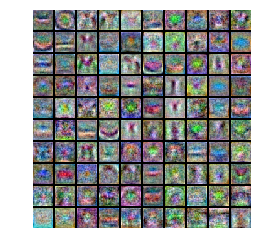

In [100]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$hidden_size = 100,learning_rate = 0.001000,learning_rate_decay = 0.950000,reg = 0.200000,batch_size = 400

In [108]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

bestacc = 0
input_size = 32 * 32 * 3
hidden_sizes = [50, 80, 100]
num_classes = 10
for hidden_size in hidden_sizes:
    for learning_rate in [1e-4, 2e-4, 5e-4, 1e-3]:
        for learning_rate_decay in [0.99, 0.95]:
            for reg in [0.1, 0.2, 0.25]:
                for batch_size in [200, 400, 600]:
                    net = TwoLayerNet(input_size, hidden_size, num_classes)

                    # Train the network
                    stats = net.train(X_train, y_train, X_val, y_val,
                                num_iters=2000, batch_size=batch_size,
                                learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
                                reg=reg, verbose=True)

                    # Predict on the validation set
                    val_acc = (net.predict(X_val) == y_val).mean()
                    print('hidden_size = %d,learning_rate = %f,learning_rate_decay = %f,reg = %f,,batch_size = %d,\
                          Validation accuracy =%f '%(hidden_size,learning_rate,learning_rate_decay,reg,
                                                              batch_size,val_acc))
                    if bestacc<val_acc:
                        bestacc = val_acc
                        best_hidden_size = hidden_size
                        best_learning_rate = learning_rate
                        best_learning_rate_decay = learning_rate_decay
                        best_reg = reg
                        best_batch_size = batch_size
                        best_net = net

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 2000: loss 2.302743
iteration 100 / 2000: loss 2.302290
iteration 200 / 2000: loss 2.294965
iteration 300 / 2000: loss 2.247932
iteration 400 / 2000: loss 2.217162
iteration 500 / 2000: loss 2.177653
iteration 600 / 2000: loss 2.042117
iteration 700 / 2000: loss 2.008043
iteration 800 / 2000: loss 1.998781
iteration 900 / 2000: loss 2.002921
iteration 1000 / 2000: loss 2.019516
iteration 1100 / 2000: loss 1.925366
iteration 1200 / 2000: loss 1.871904
iteration 1300 / 2000: loss 1.810588
iteration 1400 / 2000: loss 1.834231
iteration 1500 / 2000: loss 1.798609
iteration 1600 / 2000: loss 1.833158
iteration 1700 / 2000: loss 1.854651
iteration 1800 / 2000: loss 1.831660
iteration 1900 / 2000: loss 1.707501
hidden_size = 50,learning_rate = 0.000100,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 200,                          Validation accuracy =0.378000 
iteration 0 / 2000: loss 2.302740
iteration 100 / 2000: loss 2.302228
iteration 200 / 2000: loss 2.297078
ite

iteration 500 / 2000: loss 2.089137
iteration 600 / 2000: loss 2.059755
iteration 700 / 2000: loss 1.961467
iteration 800 / 2000: loss 1.968297
iteration 900 / 2000: loss 2.017473
iteration 1000 / 2000: loss 1.957681
iteration 1100 / 2000: loss 1.904850
iteration 1200 / 2000: loss 1.986556
iteration 1300 / 2000: loss 1.980367
iteration 1400 / 2000: loss 1.907477
iteration 1500 / 2000: loss 1.826382
iteration 1600 / 2000: loss 1.835001
iteration 1700 / 2000: loss 1.755506
iteration 1800 / 2000: loss 1.888528
iteration 1900 / 2000: loss 1.737141
hidden_size = 50,learning_rate = 0.000100,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 200,                          Validation accuracy =0.361000 
iteration 0 / 2000: loss 2.302740
iteration 100 / 2000: loss 2.302294
iteration 200 / 2000: loss 2.297685
iteration 300 / 2000: loss 2.253659
iteration 400 / 2000: loss 2.198425
iteration 500 / 2000: loss 2.099459
iteration 600 / 2000: loss 2.103503
iteration 700 / 2000: loss 2.071397
i

iteration 1000 / 2000: loss 1.627271
iteration 1100 / 2000: loss 1.866572
iteration 1200 / 2000: loss 1.784475
iteration 1300 / 2000: loss 1.605490
iteration 1400 / 2000: loss 1.567095
iteration 1500 / 2000: loss 1.697686
iteration 1600 / 2000: loss 1.769375
iteration 1700 / 2000: loss 1.712180
iteration 1800 / 2000: loss 1.711847
iteration 1900 / 2000: loss 1.632791
hidden_size = 50,learning_rate = 0.000200,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 200,                          Validation accuracy =0.453000 
iteration 0 / 2000: loss 2.302750
iteration 100 / 2000: loss 2.298678
iteration 200 / 2000: loss 2.196621
iteration 300 / 2000: loss 2.079081
iteration 400 / 2000: loss 1.980560
iteration 500 / 2000: loss 1.924555
iteration 600 / 2000: loss 1.826295
iteration 700 / 2000: loss 1.804010
iteration 800 / 2000: loss 1.818016
iteration 900 / 2000: loss 1.773938
iteration 1000 / 2000: loss 1.703500
iteration 1100 / 2000: loss 1.724034
iteration 1200 / 2000: loss 1.72525

iteration 1500 / 2000: loss 1.670945
iteration 1600 / 2000: loss 1.764093
iteration 1700 / 2000: loss 1.666900
iteration 1800 / 2000: loss 1.647528
iteration 1900 / 2000: loss 1.661901
hidden_size = 50,learning_rate = 0.000200,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 200,                          Validation accuracy =0.436000 
iteration 0 / 2000: loss 2.302756
iteration 100 / 2000: loss 2.298034
iteration 200 / 2000: loss 2.196451
iteration 300 / 2000: loss 2.077643
iteration 400 / 2000: loss 2.074650
iteration 500 / 2000: loss 1.979356
iteration 600 / 2000: loss 1.877221
iteration 700 / 2000: loss 1.917900
iteration 800 / 2000: loss 1.789860
iteration 900 / 2000: loss 1.830806
iteration 1000 / 2000: loss 1.754988
iteration 1100 / 2000: loss 1.772795
iteration 1200 / 2000: loss 1.687848
iteration 1300 / 2000: loss 1.726452
iteration 1400 / 2000: loss 1.667842
iteration 1500 / 2000: loss 1.701622
iteration 1600 / 2000: loss 1.674540
iteration 1700 / 2000: loss 1.56920

hidden_size = 50,learning_rate = 0.000500,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 200,                          Validation accuracy =0.482000 
iteration 0 / 2000: loss 2.302742
iteration 100 / 2000: loss 2.050491
iteration 200 / 2000: loss 1.923288
iteration 300 / 2000: loss 1.803559
iteration 400 / 2000: loss 1.727305
iteration 500 / 2000: loss 1.734614
iteration 600 / 2000: loss 1.636141
iteration 700 / 2000: loss 1.590505
iteration 800 / 2000: loss 1.625808
iteration 900 / 2000: loss 1.529653
iteration 1000 / 2000: loss 1.567252
iteration 1100 / 2000: loss 1.518247
iteration 1200 / 2000: loss 1.466364
iteration 1300 / 2000: loss 1.593527
iteration 1400 / 2000: loss 1.523793
iteration 1500 / 2000: loss 1.512256
iteration 1600 / 2000: loss 1.429230
iteration 1700 / 2000: loss 1.372408
iteration 1800 / 2000: loss 1.365257
iteration 1900 / 2000: loss 1.457332
hidden_size = 50,learning_rate = 0.000500,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 400,   

iteration 100 / 2000: loss 2.136830
iteration 200 / 2000: loss 1.894576
iteration 300 / 2000: loss 1.866197
iteration 400 / 2000: loss 1.748486
iteration 500 / 2000: loss 1.648390
iteration 600 / 2000: loss 1.657297
iteration 700 / 2000: loss 1.787744
iteration 800 / 2000: loss 1.578873
iteration 900 / 2000: loss 1.510656
iteration 1000 / 2000: loss 1.487882
iteration 1100 / 2000: loss 1.568121
iteration 1200 / 2000: loss 1.571930
iteration 1300 / 2000: loss 1.586954
iteration 1400 / 2000: loss 1.525272
iteration 1500 / 2000: loss 1.519445
iteration 1600 / 2000: loss 1.420104
iteration 1700 / 2000: loss 1.544066
iteration 1800 / 2000: loss 1.422615
iteration 1900 / 2000: loss 1.423853
hidden_size = 50,learning_rate = 0.000500,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 400,                          Validation accuracy =0.476000 
iteration 0 / 2000: loss 2.302753
iteration 100 / 2000: loss 2.097840
iteration 200 / 2000: loss 1.908956
iteration 300 / 2000: loss 1.806142
i

iteration 600 / 2000: loss 1.623514
iteration 700 / 2000: loss 1.461899
iteration 800 / 2000: loss 1.462224
iteration 900 / 2000: loss 1.458504
iteration 1000 / 2000: loss 1.391905
iteration 1100 / 2000: loss 1.350090
iteration 1200 / 2000: loss 1.425678
iteration 1300 / 2000: loss 1.449618
iteration 1400 / 2000: loss 1.399166
iteration 1500 / 2000: loss 1.395208
iteration 1600 / 2000: loss 1.342067
iteration 1700 / 2000: loss 1.466678
iteration 1800 / 2000: loss 1.369672
iteration 1900 / 2000: loss 1.345661
hidden_size = 50,learning_rate = 0.001000,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 400,                          Validation accuracy =0.489000 
iteration 0 / 2000: loss 2.302737
iteration 100 / 2000: loss 1.918520
iteration 200 / 2000: loss 1.738134
iteration 300 / 2000: loss 1.660164
iteration 400 / 2000: loss 1.642490
iteration 500 / 2000: loss 1.569943
iteration 600 / 2000: loss 1.517703
iteration 700 / 2000: loss 1.427023
iteration 800 / 2000: loss 1.506367
i

iteration 1100 / 2000: loss 1.403771
iteration 1200 / 2000: loss 1.408491
iteration 1300 / 2000: loss 1.342262
iteration 1400 / 2000: loss 1.374324
iteration 1500 / 2000: loss 1.460428
iteration 1600 / 2000: loss 1.432581
iteration 1700 / 2000: loss 1.479231
iteration 1800 / 2000: loss 1.445267
iteration 1900 / 2000: loss 1.319412
hidden_size = 50,learning_rate = 0.001000,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 400,                          Validation accuracy =0.488000 
iteration 0 / 2000: loss 2.302751
iteration 100 / 2000: loss 1.923916
iteration 200 / 2000: loss 1.733550
iteration 300 / 2000: loss 1.661060
iteration 400 / 2000: loss 1.562752
iteration 500 / 2000: loss 1.510252
iteration 600 / 2000: loss 1.568932
iteration 700 / 2000: loss 1.493598
iteration 800 / 2000: loss 1.502408
iteration 900 / 2000: loss 1.464620
iteration 1000 / 2000: loss 1.444362
iteration 1100 / 2000: loss 1.463577
iteration 1200 / 2000: loss 1.412567
iteration 1300 / 2000: loss 1.34708

iteration 1600 / 2000: loss 1.806999
iteration 1700 / 2000: loss 1.784466
iteration 1800 / 2000: loss 1.700967
iteration 1900 / 2000: loss 1.647169
hidden_size = 80,learning_rate = 0.000100,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 400,                          Validation accuracy =0.379000 
iteration 0 / 2000: loss 2.302837
iteration 100 / 2000: loss 2.302188
iteration 200 / 2000: loss 2.294356
iteration 300 / 2000: loss 2.239829
iteration 400 / 2000: loss 2.151815
iteration 500 / 2000: loss 2.074701
iteration 600 / 2000: loss 2.022739
iteration 700 / 2000: loss 1.996099
iteration 800 / 2000: loss 1.950941
iteration 900 / 2000: loss 1.900387
iteration 1000 / 2000: loss 1.871108
iteration 1100 / 2000: loss 1.838952
iteration 1200 / 2000: loss 1.818408
iteration 1300 / 2000: loss 1.803416
iteration 1400 / 2000: loss 1.777511
iteration 1500 / 2000: loss 1.778643
iteration 1600 / 2000: loss 1.801599
iteration 1700 / 2000: loss 1.824948
iteration 1800 / 2000: loss 1.80197

iteration 100 / 2000: loss 2.302130
iteration 200 / 2000: loss 2.296463
iteration 300 / 2000: loss 2.246828
iteration 400 / 2000: loss 2.165223
iteration 500 / 2000: loss 2.068590
iteration 600 / 2000: loss 2.055362
iteration 700 / 2000: loss 2.026268
iteration 800 / 2000: loss 1.989118
iteration 900 / 2000: loss 1.952464
iteration 1000 / 2000: loss 1.915729
iteration 1100 / 2000: loss 1.876506
iteration 1200 / 2000: loss 1.882821
iteration 1300 / 2000: loss 1.868807
iteration 1400 / 2000: loss 1.847659
iteration 1500 / 2000: loss 1.817156
iteration 1600 / 2000: loss 1.766639
iteration 1700 / 2000: loss 1.837448
iteration 1800 / 2000: loss 1.766700
iteration 1900 / 2000: loss 1.796788
hidden_size = 80,learning_rate = 0.000100,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 600,                          Validation accuracy =0.385000 
iteration 0 / 2000: loss 2.303065
iteration 100 / 2000: loss 2.302403
iteration 200 / 2000: loss 2.295716
iteration 300 / 2000: loss 2.249624
i

iteration 600 / 2000: loss 1.900960
iteration 700 / 2000: loss 1.838208
iteration 800 / 2000: loss 1.752085
iteration 900 / 2000: loss 1.760546
iteration 1000 / 2000: loss 1.762747
iteration 1100 / 2000: loss 1.762467
iteration 1200 / 2000: loss 1.726068
iteration 1300 / 2000: loss 1.699420
iteration 1400 / 2000: loss 1.645545
iteration 1500 / 2000: loss 1.632533
iteration 1600 / 2000: loss 1.630439
iteration 1700 / 2000: loss 1.590419
iteration 1800 / 2000: loss 1.601165
iteration 1900 / 2000: loss 1.618297
hidden_size = 80,learning_rate = 0.000200,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 600,                          Validation accuracy =0.469000 
iteration 0 / 2000: loss 2.303096
iteration 100 / 2000: loss 2.292904
iteration 200 / 2000: loss 2.153080
iteration 300 / 2000: loss 2.049098
iteration 400 / 2000: loss 1.871851
iteration 500 / 2000: loss 1.837852
iteration 600 / 2000: loss 1.962326
iteration 700 / 2000: loss 1.801105
iteration 800 / 2000: loss 1.739306
i

iteration 1100 / 2000: loss 1.671430
iteration 1200 / 2000: loss 1.662793
iteration 1300 / 2000: loss 1.709936
iteration 1400 / 2000: loss 1.646717
iteration 1500 / 2000: loss 1.650706
iteration 1600 / 2000: loss 1.566941
iteration 1700 / 2000: loss 1.648972
iteration 1800 / 2000: loss 1.546459
iteration 1900 / 2000: loss 1.661821
hidden_size = 80,learning_rate = 0.000200,learning_rate_decay = 0.950000,reg = 0.100000,,batch_size = 600,                          Validation accuracy =0.453000 
iteration 0 / 2000: loss 2.303066
iteration 100 / 2000: loss 2.293491
iteration 200 / 2000: loss 2.133897
iteration 300 / 2000: loss 2.020927
iteration 400 / 2000: loss 2.057479
iteration 500 / 2000: loss 1.931193
iteration 600 / 2000: loss 1.951246
iteration 700 / 2000: loss 1.733084
iteration 800 / 2000: loss 1.777578
iteration 900 / 2000: loss 1.776216
iteration 1000 / 2000: loss 1.684775
iteration 1100 / 2000: loss 1.760205
iteration 1200 / 2000: loss 1.742472
iteration 1300 / 2000: loss 1.62769

iteration 1600 / 2000: loss 1.470583
iteration 1700 / 2000: loss 1.409435
iteration 1800 / 2000: loss 1.401804
iteration 1900 / 2000: loss 1.408450
hidden_size = 80,learning_rate = 0.000500,learning_rate_decay = 0.990000,reg = 0.100000,,batch_size = 600,                          Validation accuracy =0.494000 
iteration 0 / 2000: loss 2.303083
iteration 100 / 2000: loss 2.107064
iteration 200 / 2000: loss 1.973473
iteration 300 / 2000: loss 1.809655
iteration 400 / 2000: loss 1.771653
iteration 500 / 2000: loss 1.846067
iteration 600 / 2000: loss 1.675466
iteration 700 / 2000: loss 1.688499
iteration 800 / 2000: loss 1.548313
iteration 900 / 2000: loss 1.471938
iteration 1000 / 2000: loss 1.488882
iteration 1100 / 2000: loss 1.537429
iteration 1200 / 2000: loss 1.617457
iteration 1300 / 2000: loss 1.464536
iteration 1400 / 2000: loss 1.616693
iteration 1500 / 2000: loss 1.403963
iteration 1600 / 2000: loss 1.348416
iteration 1700 / 2000: loss 1.514150
iteration 1800 / 2000: loss 1.35642

iteration 100 / 2000: loss 2.126853
iteration 200 / 2000: loss 1.857564
iteration 300 / 2000: loss 1.775472
iteration 400 / 2000: loss 1.661296
iteration 500 / 2000: loss 1.648754
iteration 600 / 2000: loss 1.736771
iteration 700 / 2000: loss 1.662950
iteration 800 / 2000: loss 1.606677
iteration 900 / 2000: loss 1.645001
iteration 1000 / 2000: loss 1.508147
iteration 1100 / 2000: loss 1.621179
iteration 1200 / 2000: loss 1.453484
iteration 1300 / 2000: loss 1.466876
iteration 1400 / 2000: loss 1.498713
iteration 1500 / 2000: loss 1.446262
iteration 1600 / 2000: loss 1.534472
iteration 1700 / 2000: loss 1.500511
iteration 1800 / 2000: loss 1.542520
iteration 1900 / 2000: loss 1.486565
hidden_size = 80,learning_rate = 0.000500,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 200,                          Validation accuracy =0.468000 
iteration 0 / 2000: loss 2.303099
iteration 100 / 2000: loss 2.110650
iteration 200 / 2000: loss 1.909139
iteration 300 / 2000: loss 1.801108
i

iteration 600 / 2000: loss 1.523434
iteration 700 / 2000: loss 1.540033
iteration 800 / 2000: loss 1.560611
iteration 900 / 2000: loss 1.401114
iteration 1000 / 2000: loss 1.588018
iteration 1100 / 2000: loss 1.527062
iteration 1200 / 2000: loss 1.576211
iteration 1300 / 2000: loss 1.477654
iteration 1400 / 2000: loss 1.348989
iteration 1500 / 2000: loss 1.581975
iteration 1600 / 2000: loss 1.294402
iteration 1700 / 2000: loss 1.323012
iteration 1800 / 2000: loss 1.583520
iteration 1900 / 2000: loss 1.405048
hidden_size = 80,learning_rate = 0.001000,learning_rate_decay = 0.990000,reg = 0.200000,,batch_size = 200,                          Validation accuracy =0.498000 
iteration 0 / 2000: loss 2.303062
iteration 100 / 2000: loss 1.939716
iteration 200 / 2000: loss 1.740987
iteration 300 / 2000: loss 1.661601
iteration 400 / 2000: loss 1.690770
iteration 500 / 2000: loss 1.523627
iteration 600 / 2000: loss 1.629269
iteration 700 / 2000: loss 1.547611
iteration 800 / 2000: loss 1.465609
i

iteration 1100 / 2000: loss 1.441168
iteration 1200 / 2000: loss 1.346847
iteration 1300 / 2000: loss 1.408861
iteration 1400 / 2000: loss 1.455402
iteration 1500 / 2000: loss 1.453918
iteration 1600 / 2000: loss 1.419668
iteration 1700 / 2000: loss 1.335303
iteration 1800 / 2000: loss 1.447961
iteration 1900 / 2000: loss 1.382302
hidden_size = 80,learning_rate = 0.001000,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 200,                          Validation accuracy =0.508000 
iteration 0 / 2000: loss 2.303082
iteration 100 / 2000: loss 1.971075
iteration 200 / 2000: loss 1.790277
iteration 300 / 2000: loss 1.763868
iteration 400 / 2000: loss 1.658025
iteration 500 / 2000: loss 1.476540
iteration 600 / 2000: loss 1.625349
iteration 700 / 2000: loss 1.517973
iteration 800 / 2000: loss 1.499490
iteration 900 / 2000: loss 1.421636
iteration 1000 / 2000: loss 1.507295
iteration 1100 / 2000: loss 1.470345
iteration 1200 / 2000: loss 1.379651
iteration 1300 / 2000: loss 1.44836

iteration 1600 / 2000: loss 1.695744
iteration 1700 / 2000: loss 1.859743
iteration 1800 / 2000: loss 1.773816
iteration 1900 / 2000: loss 1.745988
hidden_size = 100,learning_rate = 0.000100,learning_rate_decay = 0.990000,reg = 0.200000,,batch_size = 200,                          Validation accuracy =0.384000 
iteration 0 / 2000: loss 2.303229
iteration 100 / 2000: loss 2.302302
iteration 200 / 2000: loss 2.292802
iteration 300 / 2000: loss 2.238381
iteration 400 / 2000: loss 2.105420
iteration 500 / 2000: loss 2.057273
iteration 600 / 2000: loss 2.043524
iteration 700 / 2000: loss 1.991506
iteration 800 / 2000: loss 1.983651
iteration 900 / 2000: loss 1.919994
iteration 1000 / 2000: loss 1.900270
iteration 1100 / 2000: loss 1.864152
iteration 1200 / 2000: loss 1.850363
iteration 1300 / 2000: loss 1.834427
iteration 1400 / 2000: loss 1.829932
iteration 1500 / 2000: loss 1.811519
iteration 1600 / 2000: loss 1.879841
iteration 1700 / 2000: loss 1.784746
iteration 1800 / 2000: loss 1.7449

iteration 100 / 2000: loss 2.302330
iteration 200 / 2000: loss 2.292964
iteration 300 / 2000: loss 2.237955
iteration 400 / 2000: loss 2.174722
iteration 500 / 2000: loss 2.101562
iteration 600 / 2000: loss 2.061872
iteration 700 / 2000: loss 2.007710
iteration 800 / 2000: loss 2.033081
iteration 900 / 2000: loss 1.985100
iteration 1000 / 2000: loss 1.965212
iteration 1100 / 2000: loss 1.915486
iteration 1200 / 2000: loss 1.878119
iteration 1300 / 2000: loss 1.827248
iteration 1400 / 2000: loss 1.833227
iteration 1500 / 2000: loss 1.869449
iteration 1600 / 2000: loss 1.848658
iteration 1700 / 2000: loss 1.814343
iteration 1800 / 2000: loss 1.787756
iteration 1900 / 2000: loss 1.739037
hidden_size = 100,learning_rate = 0.000100,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 400,                          Validation accuracy =0.367000 
iteration 0 / 2000: loss 2.303232
iteration 100 / 2000: loss 2.302379
iteration 200 / 2000: loss 2.294973
iteration 300 / 2000: loss 2.247669


iteration 600 / 2000: loss 1.863715
iteration 700 / 2000: loss 1.785989
iteration 800 / 2000: loss 1.811260
iteration 900 / 2000: loss 1.743011
iteration 1000 / 2000: loss 1.749877
iteration 1100 / 2000: loss 1.730400
iteration 1200 / 2000: loss 1.692309
iteration 1300 / 2000: loss 1.647987
iteration 1400 / 2000: loss 1.642490
iteration 1500 / 2000: loss 1.673504
iteration 1600 / 2000: loss 1.601430
iteration 1700 / 2000: loss 1.636991
iteration 1800 / 2000: loss 1.672412
iteration 1900 / 2000: loss 1.614811
hidden_size = 100,learning_rate = 0.000200,learning_rate_decay = 0.990000,reg = 0.200000,,batch_size = 400,                          Validation accuracy =0.448000 
iteration 0 / 2000: loss 2.303198
iteration 100 / 2000: loss 2.292423
iteration 200 / 2000: loss 2.168021
iteration 300 / 2000: loss 2.043082
iteration 400 / 2000: loss 1.924791
iteration 500 / 2000: loss 1.906664
iteration 600 / 2000: loss 1.867097
iteration 700 / 2000: loss 1.815472
iteration 800 / 2000: loss 1.732959


iteration 1100 / 2000: loss 1.754843
iteration 1200 / 2000: loss 1.658417
iteration 1300 / 2000: loss 1.719677
iteration 1400 / 2000: loss 1.663857
iteration 1500 / 2000: loss 1.698852
iteration 1600 / 2000: loss 1.646510
iteration 1700 / 2000: loss 1.604473
iteration 1800 / 2000: loss 1.620491
iteration 1900 / 2000: loss 1.678685
hidden_size = 100,learning_rate = 0.000200,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 400,                          Validation accuracy =0.448000 
iteration 0 / 2000: loss 2.303198
iteration 100 / 2000: loss 2.293559
iteration 200 / 2000: loss 2.180351
iteration 300 / 2000: loss 2.054701
iteration 400 / 2000: loss 2.005902
iteration 500 / 2000: loss 1.919485
iteration 600 / 2000: loss 1.889676
iteration 700 / 2000: loss 1.840831
iteration 800 / 2000: loss 1.826466
iteration 900 / 2000: loss 1.753290
iteration 1000 / 2000: loss 1.709772
iteration 1100 / 2000: loss 1.716876
iteration 1200 / 2000: loss 1.797513
iteration 1300 / 2000: loss 1.6424

iteration 1600 / 2000: loss 1.400066
iteration 1700 / 2000: loss 1.521393
iteration 1800 / 2000: loss 1.438349
iteration 1900 / 2000: loss 1.425174
hidden_size = 100,learning_rate = 0.000500,learning_rate_decay = 0.990000,reg = 0.200000,,batch_size = 400,                          Validation accuracy =0.499000 
iteration 0 / 2000: loss 2.303208
iteration 100 / 2000: loss 2.103330
iteration 200 / 2000: loss 1.937787
iteration 300 / 2000: loss 1.784247
iteration 400 / 2000: loss 1.764401
iteration 500 / 2000: loss 1.694824
iteration 600 / 2000: loss 1.571486
iteration 700 / 2000: loss 1.650810
iteration 800 / 2000: loss 1.484448
iteration 900 / 2000: loss 1.593708
iteration 1000 / 2000: loss 1.571667
iteration 1100 / 2000: loss 1.534977
iteration 1200 / 2000: loss 1.508635
iteration 1300 / 2000: loss 1.529963
iteration 1400 / 2000: loss 1.460693
iteration 1500 / 2000: loss 1.508740
iteration 1600 / 2000: loss 1.472341
iteration 1700 / 2000: loss 1.402113
iteration 1800 / 2000: loss 1.3691

iteration 100 / 2000: loss 2.100285
iteration 200 / 2000: loss 1.924426
iteration 300 / 2000: loss 1.810278
iteration 400 / 2000: loss 1.750588
iteration 500 / 2000: loss 1.730873
iteration 600 / 2000: loss 1.591845
iteration 700 / 2000: loss 1.601651
iteration 800 / 2000: loss 1.622636
iteration 900 / 2000: loss 1.548911
iteration 1000 / 2000: loss 1.481882
iteration 1100 / 2000: loss 1.469535
iteration 1200 / 2000: loss 1.445975
iteration 1300 / 2000: loss 1.476394
iteration 1400 / 2000: loss 1.496625
iteration 1500 / 2000: loss 1.460782
iteration 1600 / 2000: loss 1.444874
iteration 1700 / 2000: loss 1.467020
iteration 1800 / 2000: loss 1.437328
iteration 1900 / 2000: loss 1.376239
hidden_size = 100,learning_rate = 0.000500,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 600,                          Validation accuracy =0.500000 
iteration 0 / 2000: loss 2.303370
iteration 100 / 2000: loss 2.103777
iteration 200 / 2000: loss 1.940592
iteration 300 / 2000: loss 1.864275


iteration 600 / 2000: loss 1.548645
iteration 700 / 2000: loss 1.467218
iteration 800 / 2000: loss 1.473958
iteration 900 / 2000: loss 1.461073
iteration 1000 / 2000: loss 1.434093
iteration 1100 / 2000: loss 1.409062
iteration 1200 / 2000: loss 1.426261
iteration 1300 / 2000: loss 1.337735
iteration 1400 / 2000: loss 1.368419
iteration 1500 / 2000: loss 1.411584
iteration 1600 / 2000: loss 1.362253
iteration 1700 / 2000: loss 1.322738
iteration 1800 / 2000: loss 1.382546
iteration 1900 / 2000: loss 1.415261
hidden_size = 100,learning_rate = 0.001000,learning_rate_decay = 0.990000,reg = 0.200000,,batch_size = 600,                          Validation accuracy =0.515000 
iteration 0 / 2000: loss 2.303387
iteration 100 / 2000: loss 1.920141
iteration 200 / 2000: loss 1.739855
iteration 300 / 2000: loss 1.713713
iteration 400 / 2000: loss 1.648770
iteration 500 / 2000: loss 1.641494
iteration 600 / 2000: loss 1.554708
iteration 700 / 2000: loss 1.542545
iteration 800 / 2000: loss 1.556728


iteration 1100 / 2000: loss 1.445886
iteration 1200 / 2000: loss 1.434912
iteration 1300 / 2000: loss 1.410077
iteration 1400 / 2000: loss 1.356808
iteration 1500 / 2000: loss 1.371294
iteration 1600 / 2000: loss 1.376820
iteration 1700 / 2000: loss 1.298415
iteration 1800 / 2000: loss 1.318767
iteration 1900 / 2000: loss 1.398964
hidden_size = 100,learning_rate = 0.001000,learning_rate_decay = 0.950000,reg = 0.200000,,batch_size = 600,                          Validation accuracy =0.500000 
iteration 0 / 2000: loss 2.303340
iteration 100 / 2000: loss 1.892780
iteration 200 / 2000: loss 1.679258
iteration 300 / 2000: loss 1.630342
iteration 400 / 2000: loss 1.601393
iteration 500 / 2000: loss 1.460008
iteration 600 / 2000: loss 1.575294
iteration 700 / 2000: loss 1.470537
iteration 800 / 2000: loss 1.562447
iteration 900 / 2000: loss 1.531629
iteration 1000 / 2000: loss 1.552530
iteration 1100 / 2000: loss 1.466420
iteration 1200 / 2000: loss 1.498021
iteration 1300 / 2000: loss 1.6039

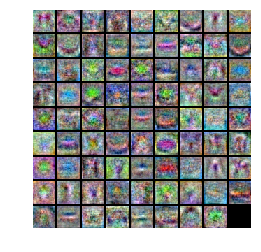

hidden_size = 80,learning_rate = 0.001000,learning_rate_decay = 0.990000,reg = 0.250000,,batch_size = 200,      Validation accuracy =0.527000 


In [111]:
# visualize the weights of the best network
show_net_weights(best_net)
print('hidden_size = %d,learning_rate = %f,learning_rate_decay = %f,reg = %f,,batch_size = %d,\
      Validation accuracy =%f '%(best_hidden_size,best_learning_rate,best_learning_rate_decay,best_reg,
                                                              best_batch_size,bestacc))

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [112]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.508


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$1 and 3

$\color{blue}{\textit Your Explanation:}$1 and 3 both decrease the risk of overfitting, while 2 can increase the probability of overfitting.

